In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [77]:
df = pd.read_csv('/content/diabetes_data.csv')

In [78]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [80]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [251]:
X = df['Glucose'].values.reshape(-1, 1)
y = df['Outcome']

In [252]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [253]:
class SimpleClassifier:
    def __init__(self, n_iteration=100, learning_rate=0.01):
        self.n_iteration = n_iteration
        self.learning_rate = learning_rate
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        self.loss_history = []


    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        for _ in range(self.n_iteration):
            z = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss_train = y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted)
            loss_train = -np.mean(loss_train)
            self.loss_history.append(loss_train)


    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(z)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def score(self, X, y):
        y_predicted = self.predict(X)
        return np.mean(y_predicted == y)

    def precision(self, X, y):
        y_predicted = self.predict(X)
        tp = np.sum((y_predicted == 1) & (y == 1))
        fp = np.sum((y_predicted == 1) & (y == 0))
        return tp / (tp + fp)

    def plot_confusion_matrix(self, X, y):
        y_predicted = self.predict(X)
        cm = confusion_matrix(y, y_predicted)
        sns.heatmap(cm, annot=True, fmt='d')

In [254]:
classifier = SimpleClassifier(n_iteration=10_000, learning_rate=0.03)
classifier.fit(X, y)

In [255]:
print(f"Accuracy Score: {classifier.score(X, y)}")

Accuracy Score: 0.7421875


In [256]:
classifier.weights, classifier.bias

(array([4.41009814]), -3.3389685887164804)

In [257]:
print(f"Precision Score: {classifier.precision(X, y)}")

Precision Score: 0.75


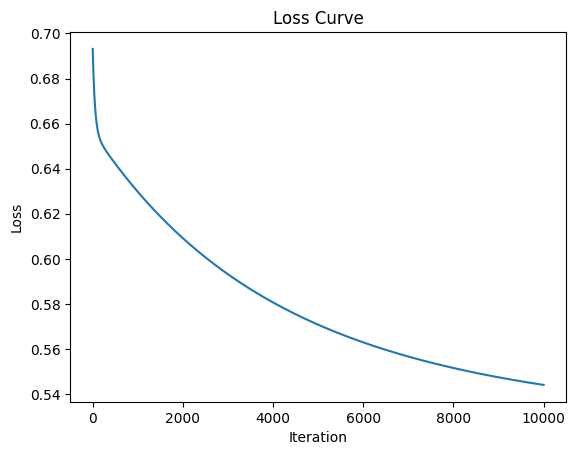

In [258]:
plt.plot(classifier.loss_history)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [259]:
print(f"Loss: {np.mean(classifier.loss_history)}")

Loss: 0.5801909236354038


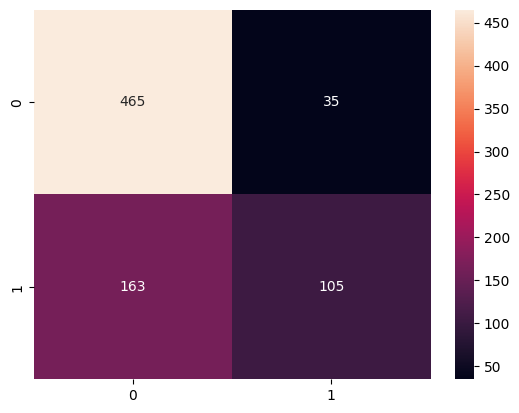

In [260]:
classifier.plot_confusion_matrix(X, y)

In [261]:
98/154

0.6363636363636364